In [11]:
from numpy import *
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float, curLine))
        dataMat.append(fltLine)
    return dataMat

In [12]:
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA-vecB, 2)))

In [13]:
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ*random.rand(k,1))
    return centroids

In [14]:
dataMat = mat(loadDataSet('testSet.txt'))

In [15]:
randCent(dataMat, 2)

matrix([[ 3.39910206, -3.74792281],
        [ 0.04339653, -2.5411309 ]])

In [16]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        # print(clusterChanged)
        for i in range(m):
            minDist = inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(dataSet[i,:], centroids[j,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:] = minIndex, minDist**2
        for cent in range(k):
            # numpy.A: 将mat转为了array，这样就可以传递进nonzero中
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]
            # print(nonzero(clusterAssment[:,0].A==cent))
            # Returns a tuple of arrays, one for each dimension of a, 
            # containing the indices of the non-zero elements in that dimension. 
            centroids[cent,:] = mean(ptsInClust, axis=0)
    return centroids, clusterAssment

In [17]:
myCentroids, clusterAssing = kMeans(dataMat, 4)

In [18]:
myCentroids

matrix([[ 2.65077367, -2.79019029],
        [-3.53973889, -2.89384326],
        [ 2.6265299 ,  3.10868015],
        [-2.46154315,  2.78737555]])

In [19]:
def biKmeans(dataSet,k,distMeas=distEclud):
    m=shape(dataSet)[0]
    clusterAssment=mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList = [mean(dataSet, axis=0).tolist()]  # create a list with one centroid
    print(mean(dataSet, axis=0).tolist())
    print(mean(dataSet, axis=0))
    for j in range(m):  # calc initial Error for each point
        clusterAssment[j, 1] = distMeas(mat(centroid0), dataSet[j, :]) ** 2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):#for every centroid
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:, 0].A == i)[0],:]
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)# 一分为2
            sseSplit = sum(splitClustAss[:, 1])
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:, 0].A != i)[0], 1])
            print("sseSplit, and notSplit: ", sseSplit, sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        #new cluster and split cluster
        bestClustAss[nonzero(bestClustAss[:, 0].A == 1)[0], 0] = len(centList)
        bestClustAss[nonzero(bestClustAss[:, 0].A == 0)[0], 0] = bestCentToSplit
        print(len(clusterAssment[nonzero(clusterAssment[:, 0].A == bestCentToSplit)[0],:]))
        print('the bestCentToSplit is: ', bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0, :].tolist()[0]
        centList.append(bestNewCents[1, :].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:, 0].A == bestCentToSplit)[0],:] = bestClustAss
    return mat(centList), clusterAssment

In [20]:
dataMat2 = mat(loadDataSet('testSet2.txt'))
myCentroids, clusterAssing = biKmeans(dataMat, 4)

[[-0.10361321250000004, 0.05430119999999998]]
[[-0.10361321  0.0543012 ]]
sseSplit, and notSplit:  828.6926539968681 0.0
80
the bestCentToSplit is:  0
the len of bestClustAss is:  80
sseSplit, and notSplit:  62.64959202653465 428.6946327807764
sseSplit, and notSplit:  87.30471264989171 399.99802121609173
40
the bestCentToSplit is:  1
the len of bestClustAss is:  40
sseSplit, and notSplit:  62.64959202653465 87.30471264989171
sseSplit, and notSplit:  28.338601567820938 436.3165071745162
sseSplit, and notSplit:  21.81887228878202 450.98424790755917
40
the bestCentToSplit is:  0
the len of bestClustAss is:  40


In [21]:
def distSLC(vecA, vecB):
    a = sin(vecA[0,1]*pi/180) * sin(vecB[0,1]*pi/180)
    b = cos(vecA[0,1]*pi/180) * cos(vecB[0,1]*pi/180) * cos(pi*(vecB[0,0]-vecA[0,0])/180)
    return arccos(a+b)*6371.0

In [30]:
import matplotlib
import matplotlib.pyplot as plt
from numpy import *

def clusterClubs(numClust=5):
    datList = []
    for line in open('places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')
    ax0.imshow(imgP)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

[[-122.63167620289852, 45.512306695652164]]
[[-122.6316762   45.5123067]]
sseSplit, and notSplit:  3063.694733479093 0.0
69
the bestCentToSplit is:  0
the len of bestClustAss is:  69
sseSplit, and notSplit:  1199.115261812206 1162.9615621444648
sseSplit, and notSplit:  718.6961833903965 1900.733171334627
35
the bestCentToSplit is:  0
the len of bestClustAss is:  35
sseSplit, and notSplit:  476.97002203426865 1330.8979675540695
sseSplit, and notSplit:  859.8562027581011 1199.115261812206
sseSplit, and notSplit:  24.098295071442127 2194.1404185470665
29
the bestCentToSplit is:  0
the len of bestClustAss is:  29
sseSplit, and notSplit:  97.33119431688148 1539.16184965158
sseSplit, and notSplit:  775.8168883072065 644.9064274438731
sseSplit, and notSplit:  75.19223026830679 1639.9315841787336
sseSplit, and notSplit:  46.1498896148143 1599.6041074908276
34
the bestCentToSplit is:  1
the len of bestClustAss is:  34


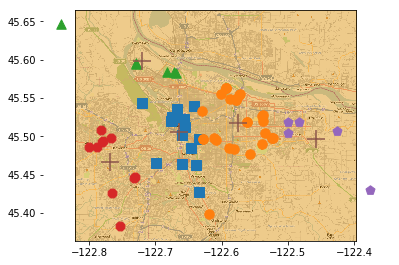

In [34]:
clusterClubs(5)